In [137]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from kmeans import k_means

In [138]:
%matplotlib notebook

## Read Data

In [139]:
#load data, drop the name, episodes, and members
## Read data
data_path = './data./'
anime = pd.read_csv(os.path.join(data_path,'anime_cleaned.csv')).drop(['anime_id', 'name'], axis=1) #keep genre


test_list = list(anime.columns)
test_string = 'type'
res = [ele for ele in test_list if(test_string in ele)]

print(res)

anime = anime.drop(res, axis=1)


rating = pd.read_csv(os.path.join(data_path,'rating_cleaned.csv'))
rating_derek = pd.read_csv(os.path.join(data_path,'rating_derek.csv'))
rating_fei = pd.read_csv(os.path.join(data_path,'rating_fei.csv'))
rating_sun = pd.read_csv(os.path.join(data_path,'rating_sun.csv'))



rating_miko = pd.read_csv(os.path.join(data_path,'rating_miko.csv'))



#read dataset with names
animeWithName = pd.read_csv(os.path.join(data_path, 'anime_cleaned.csv'))

['type_Movie', 'type_Music', 'type_ONA', 'type_OVA', 'type_Special', 'type_TV']


In [140]:
anime


,episodes,rating,members,genre_Drama,genre_Romance,genre_School,genre_Supernatural,genre_Action,genre_Adventure,genre_Fantasy,...,genre_Josei,genre_ShounenAi,genre_Game,genre_Dementia,genre_Harem,genre_Cars,genre_Kids,genre_ShoujoAi,genre_Yaoi,genre_Yuri
0,0.000000,0.924370,0.197867,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.034673,0.911164,0.782769,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.027518,0.909964,0.112683,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.012658,0.900360,0.664323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.027518,0.899160,0.149180,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10251,0.000000,0.486194,0.004901,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10252,0.001101,0.481393,0.005163,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
10253,0.000000,0.434574,0.003316,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10254,0.000550,0.427371,0.004476,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Hyperparameters

In [141]:
n_clusters = 10
good_rating_threshold = 5

## Creat dataset

In [131]:
animeData = np.array(anime).astype(int)

(44, 44)


<IPython.core.display.Javascript object>


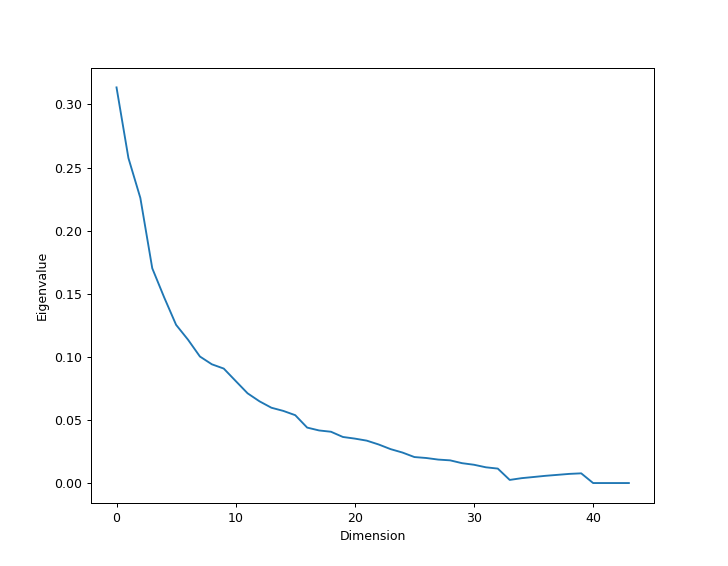

Text(0, 0.5, 'Eigenvalue')

In [132]:
## Visualize PCA-explained variance ratio
animeData_cov = np.cov(np.transpose(animeData))
print(animeData_cov.shape)
eigenvalues, eigenvectors = np.linalg.eig(animeData_cov)
plt.plot(eigenvalues)
plt.xlabel('Dimension')
plt.ylabel('Eigenvalue')

## PCA 
### Reduce to 3-dimension

In [133]:
pca = PCA(n_components = 3)
pca.fit(animeData[:,1:len(animeData)-4])
pca_samples = pca.transform(animeData[:,1:len(animeData)-4])
print(pca_samples)
tocluster = pd.DataFrame(pca_samples)
tocluster

[[-0.20346523 -0.73191466 -0.32970388]
 [ 1.18256842  0.35893861  0.75049482]
 [ 0.53181725  0.92127694 -0.74845225]
 ...
 [ 0.89565732 -0.11784243 -0.46855293]
 [-0.10698437 -0.7769879  -0.21807406]
 [-0.12186864 -0.43454854 -0.0138616 ]]


,0,1,2
0,-0.203465,-0.731915,-0.329704
1,1.182568,0.358939,0.750495
2,0.531817,0.921277,-0.748452
3,0.295105,-0.348041,-0.336371
4,0.531817,0.921277,-0.748452
...,...,...,...
10251,-0.339041,-1.015299,-0.350946
10252,0.929019,-0.134664,-0.575736
10253,0.895657,-0.117842,-0.468553
10254,-0.106984,-0.776988,-0.218074


In [134]:
print('PCA explained variance ratio: ', sum(pca.explained_variance_ratio_))

PCA explained variance ratio:  0.3173135328249591


## K-means or EM

In [135]:
## K-means
#
#clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(tocluster)
#centers = clusterer.cluster_centers_
#c_preds = clusterer.predict(tocluster)

c_preds,centers = k_means(pca_samples,n_clusters)
centers = np.array(centers)

## EM
#clusterer = GaussianMixture(n_components=n_clusters, random_state=None).fit(tocluster)
#centers = clusterer.means_
#c_preds = clusterer.predict(tocluster)


for i in centers:
 print(i)

plt.rcParams['figure.figsize'] = (9, 7)
 

[-0.16528637 -0.61041749 -0.0572379 ]
[0.71261054 0.09311301 0.31448691]
[ 0.24842011  0.82186298 -0.35722688]
[ 0.41453053 -0.265518   -0.26938517]
[-0.64660152  0.28482504 -0.29582376]
[ 0.98758437 -0.18332916 -0.66056896]
[-0.054237   -0.38690758  0.57530367]
[ 1.2500392   0.29928248 -0.28394308]
[0.48095614 0.40124015 0.97548057]
[-0.3125082   0.63545924  0.56355484]


<IPython.core.display.Javascript object>


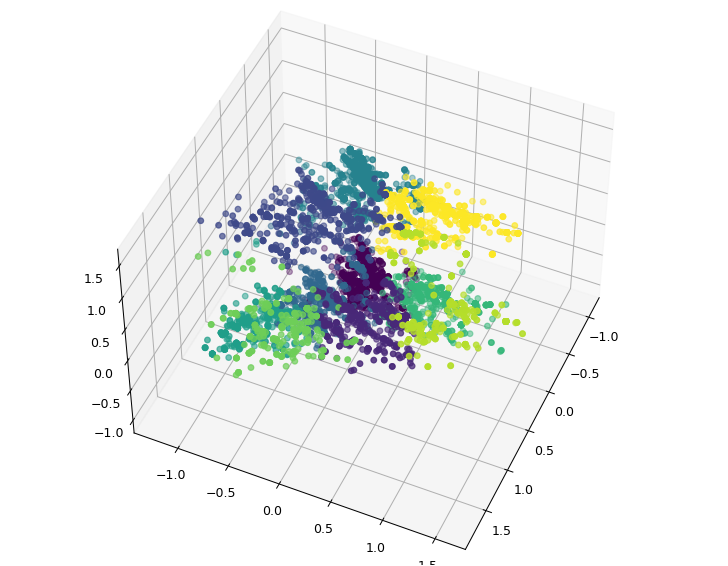

In [136]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=10)
plt.show()

 ## Regenerate Centers with Anime Names

In [117]:
#assign each anime with its cluster
animeWithName['cluster centers'] = c_preds
animeWithName['pca_x'] = tocluster[0]
animeWithName['pca_y'] = tocluster[1]
animeWithName['pca_z'] = tocluster[2]

In [118]:
#define function to view a cluster dedicatly
def clusterView(df):
    colNames = [column for column in df]
    #only read the genre of animes
    genreNames = colNames[5:len(colNames) - 8]#only count genre
    genreDict = {}
    nameDict = {}
    #create empty dict for cols
    for i in genreNames:
        genreDict [i] = 0
    for i in genreNames:
        genreScore = np.sum(df[i])
        genreDict [i] = genreScore
    #sort the map
    genreSort = sorted(genreDict.items(), key = lambda kv:(kv[1], kv[0]))
    print("liked genres and appeared time:")
    for i in reversed(genreSort):
        print(i)    
    
    return reversed(genreSort)       

In [ ]:
def pickTopAnime(df,usercenter):
    #get the center
    center = df['cluster centers']
    clusterCenter = centers[center - 1]
    #choose the nearest datapoint
    pcaPoints = df[['pca_x','pca_y','pca_z']]
    
    distances = [] 
    ####take center as usercenter
    center = np.array(usercenter)
    pcas = np.array(pcaPoints)
   
    distances = np.sum(np.square(center-pcas),1) 
    listDistances = distances.tolist()
    
    topAnime = {}
    
    for i in range(len(listDistances)):
        topAnime[df.iloc[i,1]] = (listDistances[i])
      
     
    animeSort =  sorted(topAnime.items(), key = lambda kv:(kv[1], kv[0]))
    #print( animeSort)
    return animeSort
    

In [120]:
 def getMean(userid, rating, anime):
    user = rating.loc[rating['user_id']==userid]
    mean = np.mean(user['rating'])
    
    animeLike = np.array(user.loc[user['rating'] > mean]['anime_id'])
    #animeLike = np.array(user.loc[user['rating'] > good_rating_threshold]['anime_id'])
    
    x = 0.0
    y = 0.0
    z = 0.0
    count = 0
    print(animeLike)
    for i in animeLike:
        try:
            temp = anime.loc[anime['anime_id'] == i]
            #print(count)
        except:
            continue
        count += 1
        x += float(temp['pca_x'])
        y += float(temp['pca_y'])
        z += float(temp['pca_z'])
    return [x/count,y/count,z/count]

In [121]:
def recommand(mean, centers):
    shortest = 10000.0
    idx = 0
    for c in range(len(centers)):
        distance = np.sqrt(np.sum((np.array(centers[c]) - np.array(mean))**2))
        if distance < shortest:
            shortest = distance
            idx = c
    return idx

 ## Recommendation system test out

In [122]:
#allocating clusters:
animeClusters = []
genreScores = []
topAnimes = []
for i in range(n_clusters):
    animeClusters.append(animeWithName.loc[animeWithName['cluster centers']==i])

#usermean = getMean(11, rating, animeWithName)
#usermean_miko = getMean(-10, rating_miko, animeWithName)
#usermean_fei = getMean(-6, rating_fei, animeWithName)
usermean_sun = getMean(-11, rating_sun, animeWithName)
usermean = usermean_miko

print("the user mean are: ", usermean)
index = recommand(usermean, centers)
print("choosing clustering #", index)

[  121 31240    20 26055 23847 32182  9253]
the user mean are:  [0.610377570735181, -0.1947373076956509, -0.7212892963272443]
choosing clustering # 3


In [123]:
print(clusterView(animeClusters[index]))

liked genres and appeared time:
('genre_Action', 574.0)
('genre_Sci-Fi', 420.0)
('genre_Drama', 277.0)
('type_Movie', 235)
('genre_Shounen', 222.0)
('genre_Mecha', 188.0)
('genre_Supernatural', 157.0)
('genre_Sports', 137.0)
('genre_Mystery', 112.0)
('genre_Military', 102.0)
('genre_Seinen', 94.0)
('genre_Romance', 93.0)
('genre_Historical', 86.0)
('genre_Adventure', 86.0)
('genre_Space', 83.0)
('genre_Horror', 74.0)
('genre_School', 72.0)
('genre_SuperPower', 69.0)
('genre_MartialArts', 69.0)
('genre_Psychological', 49.0)
('genre_Samurai', 43.0)
('genre_Music', 39.0)
('genre_Demons', 35.0)
('genre_Police', 34.0)
('genre_Fantasy', 30.0)
('genre_Thriller', 27.0)
('type_Music', 26)
('genre_Vampire', 26.0)
('genre_Cars', 26.0)
('genre_Game', 25.0)
('genre_Shoujo', 23.0)
('genre_SliceofLife', 20.0)
('genre_Kids', 19.0)
('genre_Magic', 17.0)
('genre_Parody', 13.0)
('genre_Dementia', 10.0)
('genre_ShounenAi', 8.0)
('genre_Josei', 7.0)
('genre_Harem', 6.0)
('genre_Yaoi', 4.0)
('genre_ShoujoAi

In [124]:
rec_list = pickTopAnime(animeClusters[index],usermean)
print("top pick for the user is: ", rec_list[0][0])

center::::::::::::::: [[ 0.13784516  0.63921262 -0.5437064 ]
 [ 0.13784516  0.63921262 -0.5437064 ]
 [ 0.13784516  0.63921262 -0.5437064 ]
 ...
 [ 0.13784516  0.63921262 -0.5437064 ]
 [ 0.13784516  0.63921262 -0.5437064 ]
 [ 0.13784516  0.63921262 -0.5437064 ]]
top pick for the user is:  Haai Step Jun


In [125]:
rec_list

[('Haai Step Jun', 0.0070732203038179255),
 ('Kimi ga Nozomu Eien: Gundam Parody', 0.010161192328928032),
 ('Busou Shinki', 0.01345925398524804),
 ('KanColle Movie', 0.014484664672182923),
 ('Kantai Collection: KanColle', 0.014484664672182923),
 ('Ghost in the Shell: Stand Alone Complex - Solid State Society',
  0.015488012679374136),
 ('Ghost in the Shell: Stand Alone Complex - Solid State Society 3D',
  0.015488012679374136),
 ('Choujuu Kishin Dancougar: Hakunetsu no Shuushou', 0.027635866768146868),
 ('Dagram vs. Round-Facer', 0.027635866768146868),
 ('Mobile Suit Gundam Battlefield Record: Avant-Title', 0.027635866768146868),
 ('Ring of Gundam', 0.027635866768146868),
 ('Code Geass: Hangyaku no Lelouch Recaps', 0.028916071258245878),
 ('Code Geass: Hangyaku no Lelouch Special Edition Black Rebellion',
  0.028916071258245878),
 ('Ghost in the Shell 2: Innocence', 0.029127038284235456),
 ('Mobile Suit Gundam MS IGLOO: Apocalypse 0079', 0.031351403390261795),
 ('Mobile Suit Gundam MS 